### 파이썬 머신러닝
## 비지도학습과 데이터 전처리
---
# 스케일 조정

- 커널 SVM 을 배우면서, 데이터 속성들의 스케일 조정이 중요하다는 점을 강조했습니다.
- 일반적으로 다차원 공간상의 거리(distance) 가 중요한 모델에서는 모두 스케일 조정이 필요합니다.
- 현실 데이터를 확보했을 때, 스케일 조정이 필요한지 아닌지 판단하는 것이 가장 우선되어야 할 요소입니다.

### 대표적인 스케일 조정 방식
1. StandardScaler : 각 속성들을 평균이 0, 표준편차가 1이 되도록 조정
2. MinMaxScaler : 최소값이 0, 최대값이 1이 되도록 비율을 조정
3. Normalizer : 속성(열)이 아니라 각각의 샘플(행)의 유클리디안 길이가 1이 되도록 조정 (지름이 1인 구 표면에 각각의 샘플을 투영)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Numpy 를 이용하는 방법

In [2]:
X = np.arange(12).reshape(4,3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

- 각 속성(열)의 범위를 0~1 로 제한하고 싶을 경우

In [3]:
X_max = X.max(axis=0)
X_min = X.min(axis=0)

X_ms = (X-X_min) / (X_max-X_min)
X_ms

array([[0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        ]])

- 각 속성(열)을 정규분표(평균이 0, 표준편차가 1)로 바꾸고 싶을 경우

In [4]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_ss = (X-X_mean) / X_std
X_ss

array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

- 각 샘플(행)의 길이를 1로 바꾸고 싶을 경우

In [8]:
X_dist = np.sqrt((X**2).sum(axis=1)) # 각 행의 길이를 구한다

X_ns = X / X_dist.reshape(-1,1) # reshape() 로 열 벡터로 변환
X_ns

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887]])

(-16.14403854696655,
 15.023611748360548,
 -16.378568617794436,
 15.716241196220096)

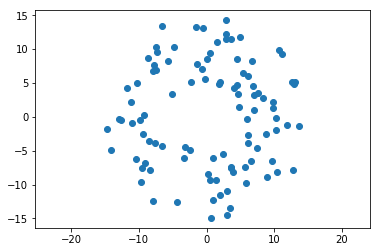

In [10]:
c1 = np.random.uniform(0,np.pi*2, size=100)
c2 = np.random.uniform(5,15,size=100)
X = np.c_[c2*np.cos(c1),c2*np.sin(c1)]
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

### sklearn 활용

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

ms = MinMaxScaler()
ms.fit(X)
ms.transform(X)
#ms.fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        ]])

In [10]:
ss = StandardScaler()
ss.fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

In [11]:
ns = Normalizer()
ns.fit_transform(X)

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887]])

- 학습세트와 테스트세트가 분리하였을 때에는, 학습세트를 가지고 스케일 조정에 대한 기준을 만든 다음 이 기준에 따라 테스트세트를 조정하여야 한다.
> ss.fit(X_train)<br>
> ss.transform(X_train)<br>
> ss.transform(X_test)

- 목표값인 y 에 대해서는 스케일 조정이 일반적으로 필요하지 않다.

```
X_train, X_test

m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train - m)/s
X_test_norm = (X_test - m)/s
```

### 회전변환 사례

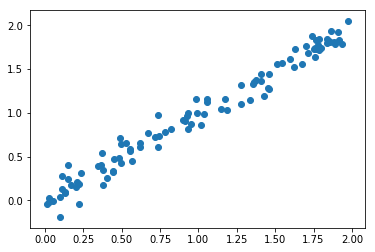

In [3]:
xs = np.random.uniform(0,2,size=100)
ys = xs + np.random.normal(0, 0.1, size=100)

plt.scatter(xs, ys)

(-0.1339943707281869,
 2.9198746176963373,
 -0.2119949720503422,
 0.23289449597522446)

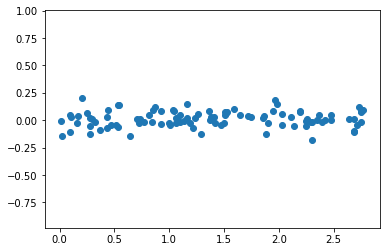

In [24]:
xs2 = xs * np.cos(np.pi/4) + ys * np.sin(np.pi/4)
ys2 = -xs * np.sin(np.pi/4) + ys * np.cos(np.pi/4)

plt.scatter(xs2, ys2)
plt.axis('equal')

(-0.1339943707281869,
 2.9198746176963373,
 -0.2119949720503422,
 0.23289449597522446)

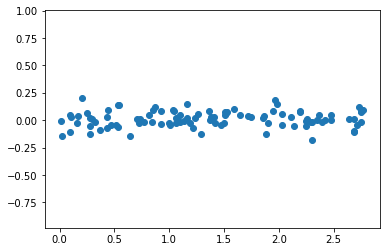

In [26]:
X = np.c_[xs, ys]

theta = -np.pi/4
tf = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]] # 회전변환 행렬
X_rot = np.matmul(X, tf) # 행렬곱

plt.scatter(X_rot[:,0], X_rot[:,1])
plt.axis('equal')

### 척도 변환
- (x,y) -> (반지름, 각도)
- 매니폴드 -> 말린 양탄자